# РК1 ОПЖЦ АСОИУ Вариант 18 (ИУ5-65Б Якимова Татьяна)

https://mail.bmstu.ru/~mvc@bmstu.ru/inform/564/18.pdf

## Задача А

In [23]:
#Определение доверительной вероятности для оценки среднего значения с точностью e=1
import numpy as np
from scipy import stats

data = np.array([13, 10, 9, 7, 11, 9, 12, 13, 8, 9])

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  
n = len(data)

e = 1

t_critical = e / (sample_std / np.sqrt(n))

confidence_level = 2 * (1 - stats.t.cdf(t_critical, df=n-1))

print(f"Доверительная вероятность: {confidence_level:.2f}")

Доверительная вероятность: 0.16


In [22]:
# Нахождение числа измерений для точности 
e = 0.1
P = 0.99
alpha = 1 - P

t_critical = stats.t.ppf(1 - alpha / 2, df=n-1)

required_n = (t_critical * sample_std / e) ** 2

print(f"Необходимое число измерений: {np.ceil(required_n)}")

Необходимое число измерений: 4565.0


ЗАДАЧА Б

In [21]:
# Вычисление выборочного среднего, дисперсии, стандартного отклонения, размаха, максимума и минимума
data_b = np.array([
    108, 113, 105, 110, 117, 116, 111, 104, 115, 110,
    98, 104, 110, 117, 113, 114, 107, 113, 107, 101,
    112, 108, 116, 110, 111, 103, 111, 115, 110, 108,
    95, 103, 107, 107, 107, 107, 107, 100, 104, 103,
    92, 105, 106, 106, 103, 92, 104, 106, 105, 100,
    102, 114, 102, 122, 122, 99, 102, 114, 102, 99,
    101, 112, 112, 115, 101, 96, 121, 101, 118, 101,
    97, 100, 109, 97, 91, 100, 109, 100, 97, 97,
    106, 113, 120, 93, 106, 119, 109, 106, 98, 93,
    105, 108, 118, 122, 105, 118, 108, 105, 108, 105
])

sample_mean_b = np.mean(data_b)
sample_var_b = np.var(data_b, ddof=1)
sample_std_b = np.std(data_b, ddof=1)


data_range = np.max(data_b) - np.min(data_b)

data_max = np.max(data_b)
data_min = np.min(data_b)

print(f"Выборочное среднее: {sample_mean_b:.2f}")
print(f"Выборочная дисперсия: {sample_var_b:.2f}")
print(f"Стандартное отклонение: {sample_std_b:.2f}")
print(f"Размах данных: {data_range}")
print(f"Максимум: {data_max}, Минимум: {data_min}")

Выборочное среднее: 106.74
Выборочная дисперсия: 53.37
Стандартное отклонение: 7.31
Размах данных: 31
Максимум: 122, Минимум: 91


In [24]:
# Оценка математического ожидания с помощью доверительного интервала
conf_levels = [0.95, 0.99, 0.999]

for level in conf_levels:
    alpha = 1 - level
    t_critical = stats.t.ppf(1 - alpha / 2, df=len(data_b)-1)
    margin_of_error = t_critical * (sample_std_b / np.sqrt(len(data_b)))
    conf_interval = (sample_mean_b - margin_of_error, sample_mean_b + margin_of_error)
    print(f"Доверительный интервал для {level * 100}%: {conf_interval}")

Доверительный интервал для 95.0%: (np.float64(105.29048829026071), np.float64(108.18951170973928))
Доверительный интервал для 99.0%: (np.float64(104.82135624385373), np.float64(108.65864375614626))
Доверительный интервал для 99.9%: (np.float64(104.26241772043063), np.float64(109.21758227956936))


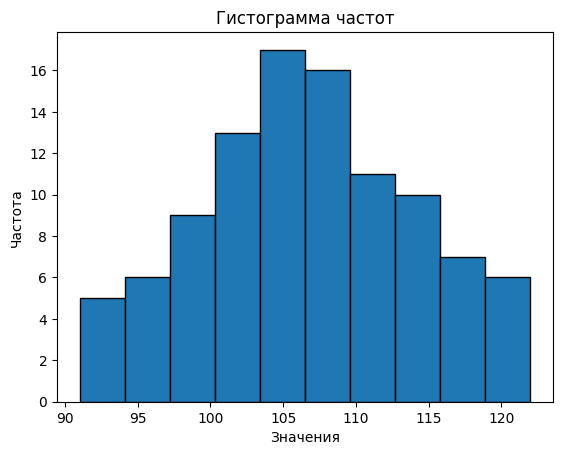

In [25]:
# Построение гистограммы часто
import matplotlib.pyplot as plt

plt.hist(data_b, bins=10, edgecolor='black')
plt.title("Гистограмма частот")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

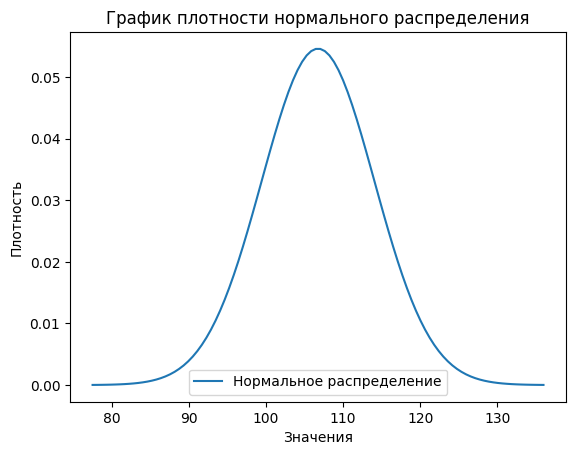

In [27]:
# Построение графика плотности нормального распределения
from scipy.stats import norm

mu, sigma = sample_mean_b, sample_std_b

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y, label="Нормальное распределение")
plt.title("График плотности нормального распределения")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend()
plt.show()

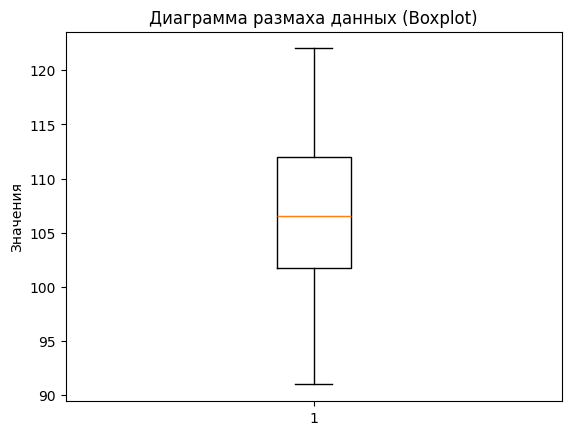

In [28]:
# Построение диаграммы размаха данных (boxplot)
plt.boxplot(data_b)
plt.title("Диаграмма размаха данных (Boxplot)")
plt.ylabel("Значения")
plt.show()

In [29]:
# Проверка гипотезы о нормальном распределении с помощью критерия Пирсона 
from scipy.stats import chisquare, norm
import numpy as np

observed_freq, bin_edges = np.histogram(data_b, bins=10)

expected_freq = len(data_b) * np.diff(norm.cdf(bin_edges, mu, sigma))

expected_freq = expected_freq * np.sum(observed_freq) / np.sum(expected_freq)

chi2_stat, p_value = chisquare(observed_freq, expected_freq)

print(f"Статистика критерия Пирсона: {chi2_stat:.2f}")
print(f"P-значение: {p_value:.4f}")

if p_value > 0.05:
    print("Основная гипотеза о нормальном распределении принимается.")
else:
    print("Основная гипотеза о нормальном распределении отвергается.")

Статистика критерия Пирсона: 5.93
P-значение: 0.7467
Основная гипотеза о нормальном распределении принимается.


ЗАДАЧА В

In [30]:
#Сравнение распределений выборок с помощью критерия Колмогорова-Смирнова
data_v = np.array([
    109.36, 121.10, 115.78, 98.19, 98.38, 108.38, 98.14, 93.99, 100.54, 114.69,
    122.48, 107.18, 97.99, 94.26, 107.88, 106.89, 96.68, 94.56, 100.57, 118.59,
    103.06, 116.36, 94.74, 96.65, 115.84, 105.43, 95.23, 95.12, 103.22, 111.36,
    105.72, 110.96, 107.38, 67.06, 114.35, 103.97, 93.77, 95.68, 105.86, 101.06,
    107.18, 97.99, 115.84, 105.43, 95.12, 103.22, 114.15, 112.73, 113.22, 96.80,
    116.36, 94.74, 114.35, 103.97, 95.68, 105.86, 107.65, 107.91, 109.63, 108.74,
    110.96, 107.38, 112.86, 102.52, 96.24, 104.71, 105.34, 110.25, 118.27, 104.02
])

ks_stat, p_value = stats.ks_2samp(data_b, data_v)

print(f"Статистика критерия Колмогорова-Смирнова: {ks_stat:.2f}")
print(f"P-значение: {p_value:.4f}")

if p_value > 0.05:
    print("Основная гипотеза о равенстве распределений принимается.")
else:
    print("Основная гипотеза о равенстве распределений отвергается.")

Статистика критерия Колмогорова-Смирнова: 0.17
P-значение: 0.1632
Основная гипотеза о равенстве распределений принимается.


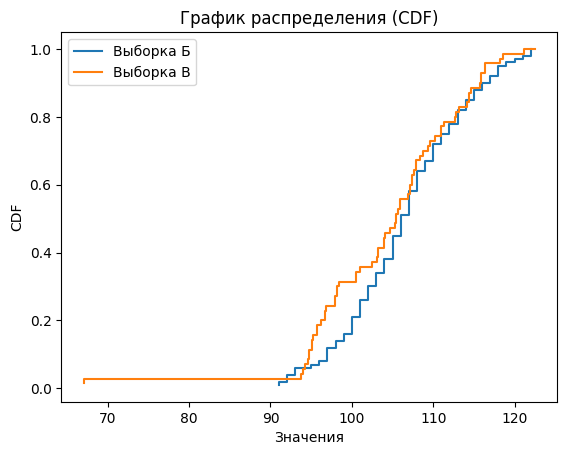

In [31]:
#  Построение графика распределения (CDF)
plt.step(np.sort(data_b), np.arange(1, len(data_b)+1)/len(data_b), label="Выборка Б")
plt.step(np.sort(data_v), np.arange(1, len(data_v)+1)/len(data_v), label="Выборка В")
plt.title("График распределения (CDF)")
plt.xlabel("Значения")
plt.ylabel("CDF")
plt.legend()
plt.show()

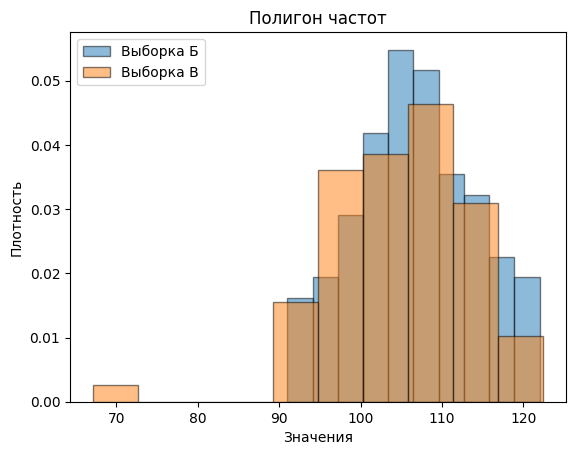

In [33]:
# Построение графика эмпирической функции плотности (полигон частот)
plt.hist(data_b, bins=10, density=True, alpha=0.5, label="Выборка Б", edgecolor='black')
plt.hist(data_v, bins=10, density=True, alpha=0.5, label="Выборка В", edgecolor='black')
plt.title("Полигон частот")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend()
plt.show()